# Introduction to Machine Learning with scikit-learn
### Full Notebook

### About me

Stefanie Senger, Historian (PhD)

- Contributor to scikit-learn

- Data Science Teacher at Le Wagon

- Connect with me on LinkedIn: https://www.linkedin.com/in/stefaniesenger/


### Workshop outline (90 min.)

- Machine Learning 101

- What is scikit-learn?

- Practical Part

  - Predictive modeling pipeline

  - Evaluation of models

  - Hyperparameter tuning

</br>
</br>
Link to notebook for participants to fill out themselves: </br>

https://github.com/StefanieSenger/Talks/blob/main/2023_EuroSciPy/2023_EuroSciPy_Intro_to_scikit-learn_fillout-notebook.ipynb

# Machine Learning 101

### Main Idea: 

### to learn from past data --> make predictions for future data

    We assume there is some structure in the data that is not purely coincidental.
    We further assume, that this structure is going to reoccur in the future.

### Types of Machine Learning
![Regression-vs-Classification](images/Regression-vs-Classification.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

    - Regression: target is continuous (something to measure)
    - Classification: target is a class (bucket)
    - Unsupervised Learning: no target

### Scikit-learn's modelling workflow

In [1]:
%%script false --no-raise-error

from sklearn.some_module import SomeModel

model = SomeModel()
model.fit(X_train, y_train)
model.predict(X_new)
model.score(X_test, y_test)

### Scikit-learns modelling workflow

![Model.fit](images/api_diagram-predictor.fit.svg)


Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

### Scikit-learns modelling workflow

![Model.predict](images/api_diagram-predictor.predict.svg)

Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

### Scikit-learn's modelling workflow

![Model.score](images/api_diagram-predictor.score.svg)

Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

### Holdout Method
![train-test-split](images/Train-Test-Split.png)

Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Train-Test-Validation.png)

### Holdout Method in scikit-learn

In [2]:
%%script false --no-raise-error

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Cross Validation

    - evens out variance in results

    - scores on validation set

![GridSearchCV](images/grid_search_cv.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

### Cross Validation in scikit-learn

In [3]:
%%script false --no-raise-error

from sklearn.model_selection import cross_validate

score = cross_validate(SomeModel(), X_train, y_train, cv=5)

### Bias-Variance Tradeoff
![Bias-Variance-Tradeoff](images/bias-variance-tradeoff.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

### Reducing Test Error

![Model-complexity](images/model-complexity.png)

Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

## Scikit-learn
    Scikit-learn (Sklearn) is a Machine Learning library that provides data preprocessing, modeling, and model selection tools.

![Scikit-learn_logo](images/1164px-Scikit_learn_logo.svg.png)
Source: [Scikit-learn](https://github.com/scikit-learn/scikit-learn/blob/main/doc/logos/scikit-learn-logo.svg)


### Scikit-learn algorithm cheat sheet
![Scikit-learn algorithm cheat sheet](images/Scikit-learn_machine_learning_decision_tree.png)

Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Scikit-learn_machine_learning_decision_tree.png)

## Predictive modeling pipeline

In [4]:
from sklearn.datasets import fetch_openml
import pandas as pd

data = fetch_openml("adult-census", parser="pandas")
X = data['data']
X

,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


#### Our goal: classify people's income as "high" or "low".

### Data Preparation

![Preproc](images/preprocessing.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

In [5]:
# Cleaning columns names
X.columns = X.columns.str.strip(":")

# Drop columns; 'education-num' contains the same information as 'education' and 'fnlwgt' is a calculated similarity between samples
X = X.drop(columns=['education-num', 'fnlwgt'])
X

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [6]:
# Checking dtypes
X.dtypes

age                  int64
workclass         category
education         category
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
dtype: object

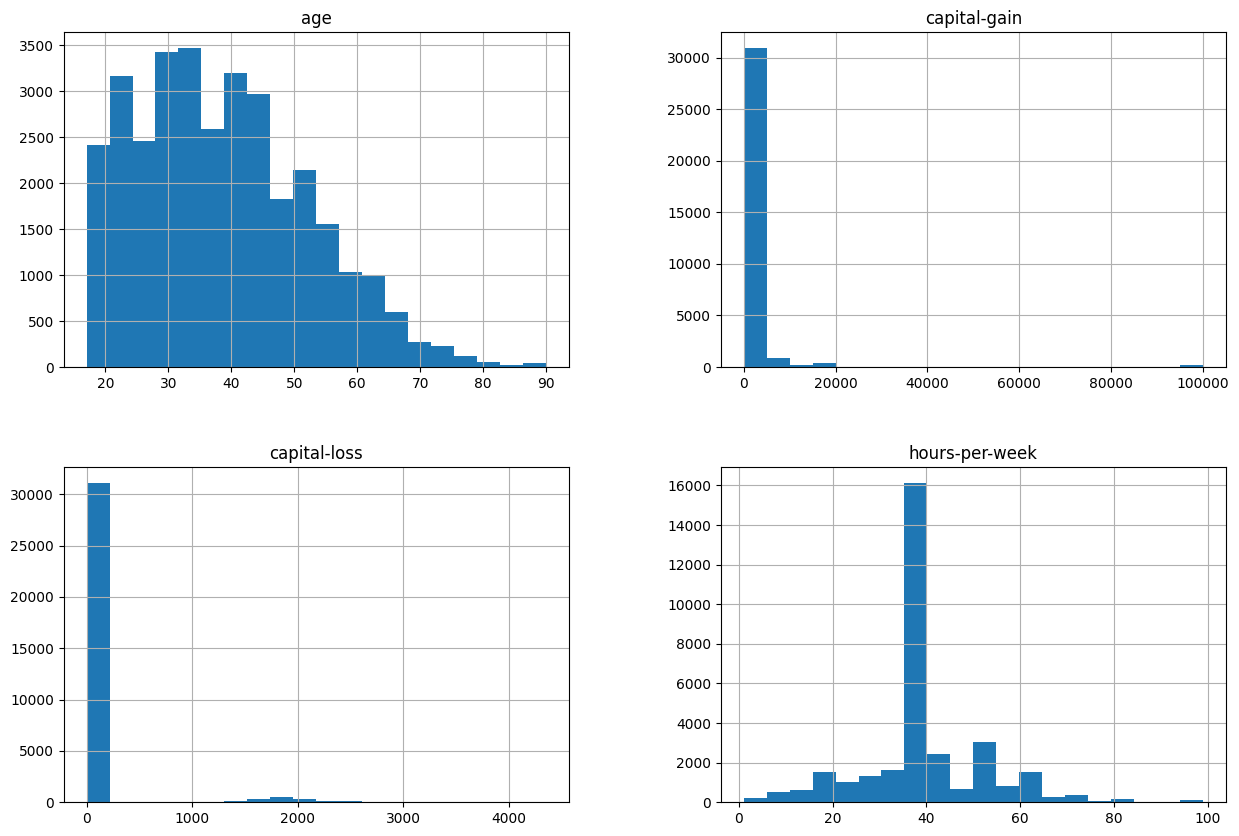

In [7]:
# Checking for impossible values
X.hist(bins=20, figsize=(15, 10)); # everything is in range of the possible

In [8]:
# Inspecting if target is ballanced
y = data['target']
y.value_counts()

class
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [9]:
# Train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Data Preparation

      - Imputing missing values
      - Encoding categorical features
      - Scaling numerical features
  
</br>

#### Preprocessing steps depend on the choice of the final estimator.

### Imputing missing values

In [10]:
# Checking for missing values
X_train.isna().sum()

age                  0
workclass         1292
education            0
marital-status       0
occupation        1297
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     407
dtype: int64

    observation: missing values only occur in categorical data</br>
    -> we will take this into account when we impute values 

### Transformers

![Transformer.fit_transform](images/api_diagram-transformer.fit_transform.svg)

Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

In [11]:
# Imputing missing values (alternatively, we could afford to drop rows with missing values, since we have enough data)
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with strategy of choice
imputer = SimpleImputer(strategy="most_frequent")

# Fit imputer
imputer.fit(X_train, y_train)

# The imputed value is stored in the transformer's memory
imputer.statistics_

array([36, 'Private', 'HS-grad', 'Married-civ-spouse', 'Craft-repair',
       'Husband', 'White', 'Male', 0, 0, 40, 'United-States'],
      dtype=object)

In [12]:
# Inspect filled up DataFrame
# sklearn.set_config(transform_output='pandas') # version 1.3
pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns) # note: I am not re-assigning
pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns).isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### Encoding

    - transforming categorical data into an equivalent numerical form

![OHE](images/ohe_visualization.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False) 

# Fit encoder
ohe.fit(X_train[['workclass']]) 

# Display the detected categories
ohe.categories_

[array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
        nan], dtype=object)]

In [14]:
# Display the new feature names
ohe.get_feature_names_out()

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_nan'],
      dtype=object)

In [15]:
# Transforming learned categories into binary columns
ohe.transform(X_train[['workclass']]) # note: I am not re-assigning

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Pipeline

    - a chain of operations in a Machine Learning project (preprocessing, training, predicting)
    - can be used to put together building blocks of several transformers and a predictive model

In [16]:
from sklearn.pipeline import Pipeline

# Build the pipeline with the different steps
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ohe', OneHotEncoder(drop = "if_binary", sparse_output = False, handle_unknown='ignore'))
])

cat_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [17]:
# Check how OHE output looks like
cat_transformer.fit(X_train[['workclass']])
cat_transformer.transform(X_train[['workclass']]) # note: I am still not re-assigning

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Scaling

    - transforming numerical features into a common smaller range

#### MinMaxScaler

### $X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$

![MinMaxScaler](images/MinMaxScaler.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

In [18]:
# Fit MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train[['age']]) 

scaler.data_range_

array([73.])

In [19]:
scaler.data_min_

array([17.])

In [20]:
scaler.data_max_

array([90.])

In [21]:
# Check how MinMaxScaler output looks like
scaler.transform(X_train[['age']]) # note: still not re-assigning

array([[0.30136986],
       [0.05479452],
       [0.02739726],
       ...,
       [0.2739726 ],
       [0.04109589],
       [0.45205479]])

### ColumnTransformer

![ColumnTransformer](images/api_diagram-columntransformer.svg)

Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector # "trick", but you can also manually select columns

num_transformer = MinMaxScaler()

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, make_column_selector(dtype_exclude='category')),
    ('cat_transformer', cat_transformer, make_column_selector(dtype_include='category'))
])

preprocessor

ColumnTransformer(transformers=[('num_transformer', MinMaxScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fafdadcfdc0>),
                                ('cat_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fafd8825f60>)])

In [23]:
# Fit and transform on the preprocessor
preprocessor.fit_transform(X_train)

array([[0.30136986, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05479452, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02739726, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2739726 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.04109589, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.07298073, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [24]:
# We cannot predict, because there is no predictor
preprocessor.predict[X_test]

AttributeError: 'ColumnTransformer' object has no attribute 'predict'

### Pipelines

    - a chain of operations in a Machine Learning project (preprocessing, training, predicting)
    - can be used to put together building blocks of several transformers and a predictive model

![Pipeline](images/pipeline.png)

Source: [Le Wagon Data Science Curriculum](https://www.lewagon.com/)

    - output of transformer is input into predictor
    - call a pipeline the same way you would call the last added estimator

Pipelines are powerful because they:

    - make your workflow much easier to read and understand
    - enforce the implementation and order of steps in your project
    - make your work reproducible and deployable

### Pipelines in scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression

# Build the pipeline combining preprocessor and predictor
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fafdadcfdc0>),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fafd8825f60>)])),
                ('logreg', LogisticRegression())])

### Everything in one cell

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LogisticRegression

# Transformers
num_transformer = MinMaxScaler()
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ohe', OneHotEncoder(drop = "if_binary", sparse_output = False, handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, make_column_selector(dtype_exclude='category')),
    ('cat_transformer', cat_transformer, make_column_selector(dtype_include='category'))
])

# Pipeline with predictor
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression(max_iter=1000))
])


pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fafd66c3820>),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fafd66c1f60>)])),
                ('logreg', LogisticRegression(max_iter=1000))])

## Evaluation of models

    The pipeline becomes an estimator.

    On it we can:

    pipeline.fit(X_train, y_train)

    pipeline.score(X_test, y_test)

    pipeline.predict(X_new)

    ... and tune hyperparameters

In [27]:
# Training and predicting untuned model
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [28]:
# Score on untuned model with default scorer
pipeline.score(X_test, y_test)

0.8509571092230526

In [29]:
# Checking with DummyClassifier (makes predictions that ignore the input features
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.predict(X_test)              # dummy.predict(X_test)[dummy.predict(X_test) != '<=50K']
dummy.score(X_test, y_test)

0.7590336779608967

In [30]:
# Comparing with class prevalence
y_test.value_counts(normalize=True)

class
<=50K    0.759034
>50K     0.240966
Name: proportion, dtype: float64

## Hyperparameter tuning

In [31]:
# Get tunable params
for param in pipeline.get_params():
    print(param)

memory
steps
verbose
preprocessor
logreg
preprocessor__n_jobs
preprocessor__remainder
preprocessor__sparse_threshold
preprocessor__transformer_weights
preprocessor__transformers
preprocessor__verbose
preprocessor__verbose_feature_names_out
preprocessor__num_transformer
preprocessor__cat_transformer
preprocessor__num_transformer__clip
preprocessor__num_transformer__copy
preprocessor__num_transformer__feature_range
preprocessor__cat_transformer__memory
preprocessor__cat_transformer__steps
preprocessor__cat_transformer__verbose
preprocessor__cat_transformer__imputer
preprocessor__cat_transformer__ohe
preprocessor__cat_transformer__imputer__add_indicator
preprocessor__cat_transformer__imputer__copy
preprocessor__cat_transformer__imputer__fill_value
preprocessor__cat_transformer__imputer__keep_empty_features
preprocessor__cat_transformer__imputer__missing_values
preprocessor__cat_transformer__imputer__strategy
preprocessor__cat_transformer__ohe__categories
preprocessor__cat_transformer__ohe

### GridSearchCV

    - allows us to check, which combination of preprocessing/modeling hyperparameters works best

![ChangingStuff](images/changing_stuff.png)

Source: [Introduction to scikit-learn by Olivier Grisel](http://ogrisel.github.io/decks/2017_intro_sklearn/#1)

![GridSeachCV](images/grid_vs_random_search.svg)

Source: [Inria Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/)

### GridSearchCV in scikit-learn

In [32]:
%%script false --no-raise-error

from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
grid = {
    'param1': [0.01, 0.1, 1], 
    'param2': [0.2, 0.5, 0.8]
}

# Instantiate Grid Search
grid_search = GridSearchCV(
    SomeModel(),
    grid, 
    scoring = ['scoring_metrics'],
    cv = 5,
) 

# Fit data to Grid Search
grid_search.fit(X_train, y_train)

# Get best params
grid_search.best_params_
grid_search.best_estimator_

In [33]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
import numpy as np

# Hyperparameter Grid
grid = {
    'preprocessor__num_transformer__feature_range': [(0,1), (0,2)], 
    'preprocessor__cat_transformer__ohe__min_frequency': [0.02, 0.05],
    'logreg__C': np.logspace(-3, 3, num=10)
}

# Instantiate Grid Search
grid_search = GridSearchCV(
    pipeline,
    grid, 
    scoring = 'accuracy',
    cv = 5,
) 

# Fit data to Grid Search
grid_search.fit(X_train, y_train)

# Get best params
grid_search.best_params_

{'logreg__C': 10.0,
 'preprocessor__cat_transformer__ohe__min_frequency': 0.02,
 'preprocessor__num_transformer__feature_range': (0, 2)}

In [34]:
# Scoring on best estimator
grid_search.best_estimator_
grid_search.best_estimator_.score(X_test, y_test)

0.8465554304432388

In [35]:
# Inspect grid_search
pd.DataFrame(grid_search.cv_results_)[['param_logreg__C', 'param_preprocessor__num_transformer__feature_range', 'param_preprocessor__cat_transformer__ohe__min_frequency', 'mean_test_score', 'rank_test_score']]

,param_logreg__C,param_preprocessor__num_transformer__feature_range,param_preprocessor__cat_transformer__ohe__min_frequency,mean_test_score,rank_test_score
0,0.001,"(0, 1)",0.02,0.789576,40
1,0.001,"(0, 2)",0.02,0.794929,38
2,0.001,"(0, 1)",0.05,0.793524,39
3,0.001,"(0, 2)",0.05,0.796771,37
4,0.004642,"(0, 1)",0.02,0.825729,34
5,0.004642,"(0, 2)",0.02,0.828844,32
6,0.004642,"(0, 1)",0.05,0.822570,36
7,0.004642,"(0, 2)",0.05,0.825597,35
8,0.021544,"(0, 1)",0.02,0.832442,29
9,0.021544,"(0, 2)",0.02,0.835206,26


In [36]:
# Predict using best_estimator_
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### Not gotten enough yet?

#### Have a look at our scikit-learn MOOC: https://inria.github.io/scikit-learn-mooc/index.html

## Thank you for your attention!